In [1]:
#загузка используемых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats

%matplotlib inline

In [47]:
#сгененируем распределение
mu = 0
sigma = 1
population = np.round(np.random.normal(mu, sigma, 10_000), 2)

In [48]:
population

array([ 0.84, -1.23, -1.38, ..., -0.02,  0.68,  1.75])

In [49]:
#Средене значние и стандартное отклонение
print('mean',population.mean())
print('std',population.std())

mean 0.011958
std 0.9923721006940894


In [11]:
sns.set(
    font_scale =1.25,
    style      ="whitegrid",
    rc         ={'figure.figsize':(10,5)}
)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


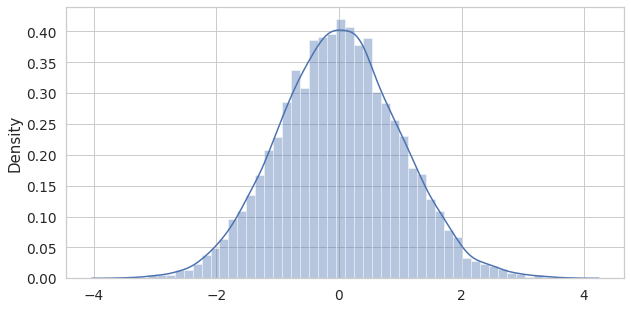

In [50]:
#Визуализируем график
sns.distplot(population, kde = True)

In [51]:
scipy.stats.normaltest(population)

NormaltestResult(statistic=8.675553392806023, pvalue=0.013065544607670104)

In [52]:
# Получение выборочного среднего
sample_size = 30 #можно менять размер выбороки  и из-за этого будет меняться стандартная ошибка среднего
sample = np.random.choice(population, sample_size, False)

In [53]:
sample

array([-1.41,  0.27, -0.97, -0.04, -0.58,  0.25, -0.04,  0.23,  1.64,
        0.44, -0.55, -0.85,  2.34,  0.36, -0.62,  2.27, -0.54, -1.62,
       -0.92, -0.52,  0.54, -1.83, -1.39, -0.79, -0.77,  0.14,  0.28,
        0.11,  0.22, -1.41])

In [54]:
sample.mean()

-0.192

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


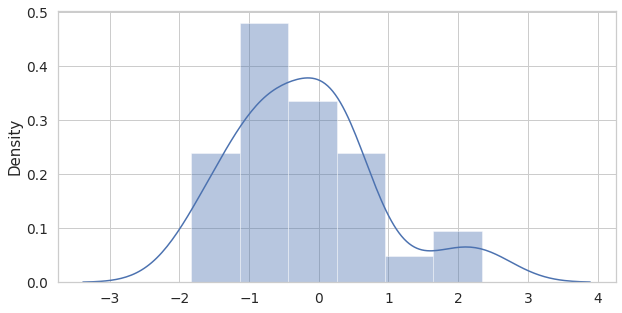

In [55]:
sns.distplot(sample, kde = True)

In [56]:
n = 1_000
sample_means = []
for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_means.append(sample.mean())

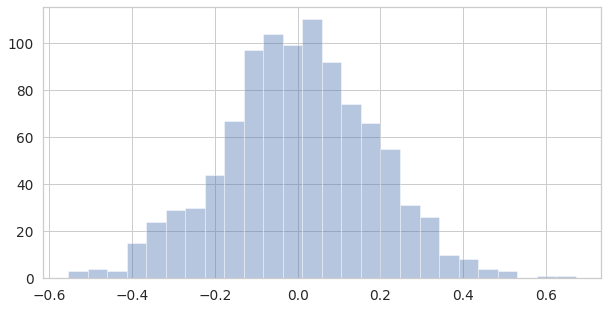

In [63]:
# sns.distplot(population, kde = False)
sns.distplot(sample_means, kde = False)

In [58]:
np.std(sample_means)

0.18206534310485586

In [59]:
np.mean(sample_means)

0.0013603333333333323

$$
SE = \frac{\sigma}{\sqrt{n}}
$$

In [60]:
se = np.std(sample_means)
se

0.18206534310485586

In [61]:
sigma = np.std(population)

sigma / np.sqrt(sample_size)

0.18118152832964696

In [ ]:
#=====================================================================================

In [77]:
sample_real = np.random.choice(population, sample_size, False)
sample_real

array([ 0.13,  0.45, -0.93, -0.01,  0.46,  0.01, -1.88,  1.22, -0.18,
        1.58,  0.08, -0.05, -0.55, -0.6 , -0.38, -0.16,  0.33,  0.19,
        1.09, -1.1 , -1.54, -0.13,  1.06, -0.09,  0.41, -1.76, -0.36,
       -0.89, -1.05,  0.39])

In [78]:
print(sample_real.mean())
print(sample_real.std())
se = sample_real.std() / sample_size ** 0.5
print('SE =', se)

-0.142
0.8284419110595503
SE = 0.15125210742333475


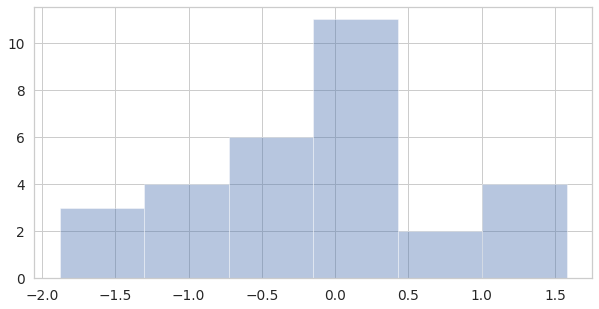

In [79]:
sns.distplot(sample_real, kde = False)

In [83]:
#Рассчет z-значения для конкретной выборки

t_scores = []
sample_means = []

n = 10_000
for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_mean = sample.mean()
    sample_std = sample.std()
    
    se = sample_std / sample_size ** 0.5
    t_score = (sample_mean - mu) / se
    
    t_scores.append(t_score)
    sample_means.append(sample_mean)

In [82]:
t_scores

[1.1566138530142445,
 -2.073200824691623,
 0.5920902150728777,
 -1.1373561518233384,
 0.15904218281602128,
 0.9231215289555009,
 -0.366655392166407,
 -0.23012281243129148,
 1.132136280662443,
 0.7109250624297696,
 -0.41853382266677214,
 -1.4011507285015878,
 2.2427278340371024,
 -0.2798072486204001,
 0.8804456607382851,
 -0.8172909110635413,
 0.42717125824608015,
 1.0947134239195495,
 -1.4847362240100113,
 0.6312783640028945,
 -1.43786902348283,
 0.5463170064663874,
 -0.1808037971841594,
 0.4297613364063996,
 -0.09996460213733822,
 0.6651415791026912,
 -0.18085526013309752,
 -1.7460164101489282,
 2.0719648492288054,
 -1.7285610294906186,
 0.625783341362435,
 0.8057792687805081,
 -0.15793335937936523,
 -0.5979132798622819,
 1.2871211855361104,
 -0.3655861239729646,
 -0.4414758794747435,
 -0.5986701068067478,
 0.26213251383732583,
 0.8385443862320031,
 1.5547598932495552,
 1.7452947454861936,
 0.6627240636720986,
 -1.29082374184803,
 0.06602195705223593,
 -1.659193062279993e-16,
 -0.6026

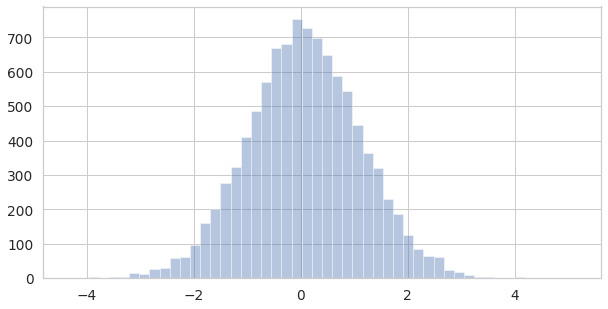

In [84]:
sns.distplot(t_scores, kde=False)

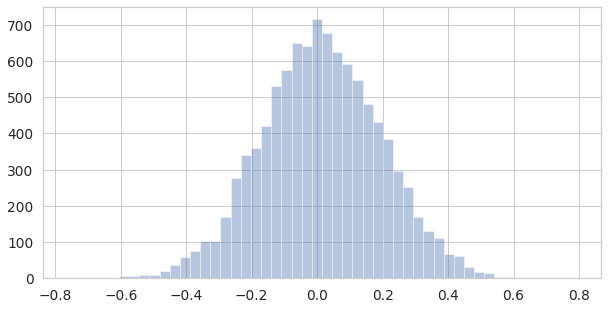

In [85]:
sns.distplot(sample_means, kde=False)